In [1]:
import json
import math
import matplotlib.pyplot as plt

In [9]:
with open('./overs_data.json') as file:
    overs_dict = json.loads(file.read())

In [10]:
overs_dict['2022']['Mumbai Indians'][0]['total']

179

In [18]:
def conceded_scored_rpo(season='2022', start_over=0, end_over=6, show_graph = True):
    ipl = overs_dict[season]
    powerplay_rpo = {}
    rpo_scored = {}
    rpo_diff = {}
    for team, matches in ipl.items():
        rpo = 0
        tot_rpo = 0
        for match in matches:
            n = 0
            runs = 0
            for over in match['innings'][start_over:end_over]:
                n += 1
                runs += over['runs']
            if n == 0:
                n = 1
            tot_rpo += runs/n
            rpo_scored.setdefault(match['batting'], [])
            rpo_scored[match['batting']].append(runs/n)

        rpo = round(tot_rpo/len(matches), 2)
        powerplay_rpo[team] = rpo

    # print(powerplay_rpo)

    for team in rpo_scored:
        rpo_scored[team] = round(
            sum(rpo_scored[team])/len(rpo_scored[team]), 2)

    # print(rpo_scored)
    teams = list(rpo_scored.keys())

    conceded = []
    scored = []
    for team in teams:
        conceded.append(powerplay_rpo[team])
        scored.append(rpo_scored[team])
        # rpo_diff[team] = round(rpo_scored[team]-powerplay_rpo[team], 2)
        plt.annotate(team, (rpo_scored[team], powerplay_rpo[team]))

    # print(rpo_diff)

    if show_graph:

        plt.title(
            f'Season: {season}, RPO scored versus conceded for overs: {start_over} to {end_over}')
        plt.xlabel('RPO Scored')
        plt.ylabel('RPO Conceded')
        plt.scatter(scored, conceded)
        plt.show()

    rpo_dict = {team:(i,j) for team, i,j in zip(teams, conceded,  scored)}

    return rpo_dict


IPL 2022

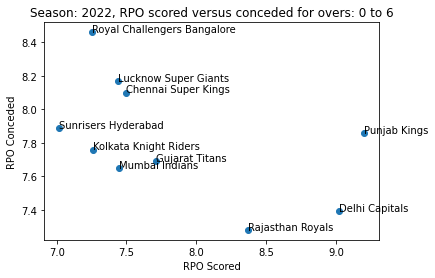

{'Chennai Super Kings': (7.5, 8.1),
 'Royal Challengers Bangalore': (7.25, 8.46),
 'Punjab Kings': (9.2, 7.86),
 'Mumbai Indians': (7.45, 7.65),
 'Delhi Capitals': (9.02, 7.39),
 'Sunrisers Hyderabad': (7.02, 7.89),
 'Rajasthan Royals': (8.37, 7.28),
 'Gujarat Titans': (7.71, 7.69),
 'Lucknow Super Giants': (7.44, 8.17),
 'Kolkata Knight Riders': (7.26, 7.76)}

In [14]:
# Powerplays
conceded_scored_rpo()

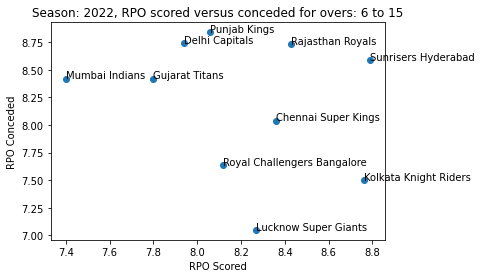

{'Chennai Super Kings': (8.36, 8.04),
 'Royal Challengers Bangalore': (8.12, 7.64),
 'Punjab Kings': (8.06, 8.84),
 'Mumbai Indians': (7.4, 8.42),
 'Delhi Capitals': (7.94, 8.74),
 'Sunrisers Hyderabad': (8.79, 8.59),
 'Rajasthan Royals': (8.43, 8.73),
 'Gujarat Titans': (7.8, 8.42),
 'Lucknow Super Giants': (8.27, 7.05),
 'Kolkata Knight Riders': (8.76, 7.5)}

In [5]:
# Middle overs
conceded_scored_rpo(start_over=6, end_over=15)

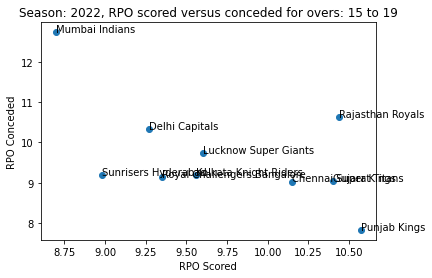

{'Chennai Super Kings': (10.15, 9.03),
 'Royal Challengers Bangalore': (9.35, 9.15),
 'Punjab Kings': (10.57, 7.83),
 'Mumbai Indians': (8.7, 12.73),
 'Delhi Capitals': (9.27, 10.33),
 'Sunrisers Hyderabad': (8.98, 9.18),
 'Rajasthan Royals': (10.44, 10.62),
 'Gujarat Titans': (10.4, 9.04),
 'Lucknow Super Giants': (9.6, 9.73),
 'Kolkata Knight Riders': (9.56, 9.18)}

In [6]:
# End Overs
conceded_scored_rpo(start_over=15, end_over=19)

In [23]:
def acronym(name):
    acro = ''
    for part in name.split(' '):
        acro += part[0]
    return acro

In [8]:
# Calculate avg rpo for runs scored vs conceded differential, scored-conceded

def calc_rpo_diff(season='2022', start_over=0, end_over=6, show_graph=True):
    rpo_dict = conceded_scored_rpo(season=season, start_over=start_over, end_over=end_over,show_graph=False)

    diff_dict = {}
    for team, rpos in rpo_dict.items():
        diff_dict[team] = rpos[0]-rpos[1]

    # Sorting diff_dict
    teams = sorted(diff_dict.keys(), key=lambda t: diff_dict[t])
    vals = [diff_dict[team] for team in teams]

    team_acronyms = list(map(acronym, teams))

    if show_graph:
        plt.bar(range(len(teams)), vals, tick_label = team_acronyms)
        plt.xticks(rotation= 60)
        plt.xlabel('Teams')
        plt.ylabel('RPO differential, Runs Scored - Runs Conceded')
        plt.title(f'IPL: {season}, RPO differential for overs: {start_over} to {end_over}')
        plt.show()

    return diff_dict


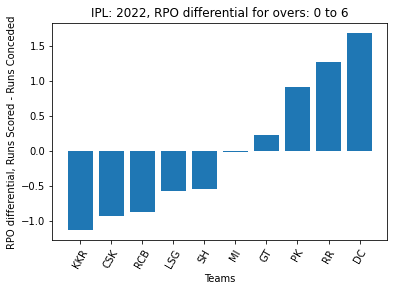

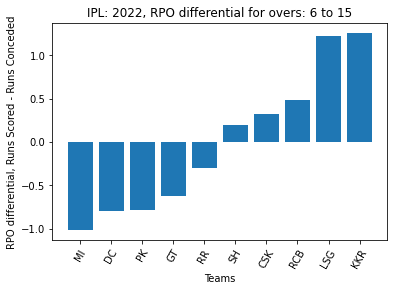

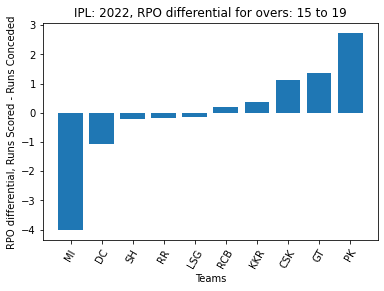

{'Chennai Super Kings': 1.120000000000001,
 'Royal Challengers Bangalore': 0.1999999999999993,
 'Punjab Kings': 2.74,
 'Mumbai Indians': -4.030000000000001,
 'Delhi Capitals': -1.0600000000000005,
 'Sunrisers Hyderabad': -0.1999999999999993,
 'Rajasthan Royals': -0.17999999999999972,
 'Gujarat Titans': 1.3600000000000012,
 'Lucknow Super Giants': -0.13000000000000078,
 'Kolkata Knight Riders': 0.3800000000000008}

In [41]:
#powerplays
calc_rpo_diff()

#Middle Overs
calc_rpo_diff(start_over=6, end_over=15)

#Death Overs
calc_rpo_diff(start_over=15, end_over=19)


### Journey of a team, based on its RPO differential

In [9]:
def rpo_diff_journey(team_name, start_over=0, end_over=6, show_graph=True):
    seasons = range(2008, 2023)
    team_rpos = []

    for season in seasons:
        try:
            rpo_diff = calc_rpo_diff(season=str(season), start_over=start_over,end_over=end_over, show_graph=False)
            team_rpos.append(rpo_diff[team_name])
        except KeyError:
            print(team_name, season)
            team_rpos.append(0)
            continue
    
    if show_graph:
        plt.plot(seasons, team_rpos, marker='o')
        plt.xlabel('Seasons')
        plt.ylabel('RPO differential')
        plt.title(f'{team_name} over the seasons')

    return team_rpos



In [10]:
def rpo_journey_combined(team_name):
    rpo_diff_journey(team_name)
    rpo_diff_journey(team_name, start_over=6, end_over=15)
    rpo_diff_journey(team_name, start_over=15, end_over=19)
    plt.legend(['Powerplay', 'Mid', 'Death'])

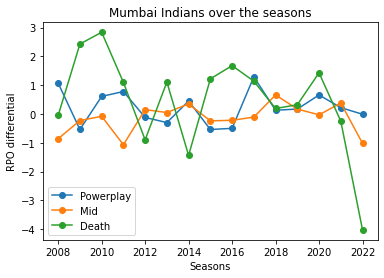

In [61]:
rpo_journey_combined('Mumbai Indians')

<ul>
<li>The above experiment seems to have been inconclusive, sticking point is that when MI do well in the death they do well over all
<li>This needs to be verified using correlation
<li>Need a list for table positions at which MI ended up over the years
<li>Also, we have to see if anything more can be extracted be looking at scored vs conceded RPOS individually
<li>Another thing that can be done is to look at the difference between the avg RPO diff and the team's RPO diff
</ul>

In [11]:
# RPO diff of a team - RPO diff for avg

def rpo_diff_over_avg(team_name, start_over=0, end_over=6, show_graph=True):
    seasons = range(2008, 2023)
    team_rpos = []

    for season in seasons:
        try:
            rpo_diff = calc_rpo_diff(season=str(season), start_over=start_over,end_over=end_over, show_graph=False)
            avg_diff = sum(rpo_diff.values())/len(rpo_diff)
            team_rpos.append(rpo_diff[team_name]-avg_diff)
        except KeyError:
            print(team_name, season)
            team_rpos.append(0)
            continue

    if show_graph:
        plt.plot(seasons, team_rpos, marker='o')
        plt.xlabel('Seasons')
        plt.ylabel('RPO differential over Avg RPO')
        plt.title(f'{team_name} over the seasons')

    return team_rpos
    



[1.0800000000000005,
 -0.5087500000000001,
 0.6374999999999995,
 0.8100000000000003,
 -0.10666666666666696,
 -0.3177777777777778,
 0.4762500000000003,
 -0.5499999999999998,
 -0.4574999999999998,
 1.3674999999999997,
 0.13624999999999954,
 0.1799999999999995,
 0.6975,
 0.2412500000000003,
 -0.010999999999999677]

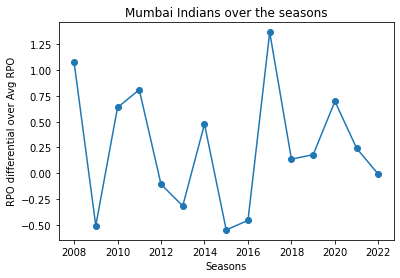

In [12]:
rpo_diff_over_avg('Mumbai Indians')

In [13]:
def rpo_journey_combined_over_avg(team_name):
    rpo_diff_over_avg(team_name)
    rpo_diff_over_avg(team_name, start_over=6, end_over=15)
    rpo_diff_over_avg(team_name, start_over=15, end_over=19)
    plt.legend(['Powerplay', 'Mid', 'Death'])


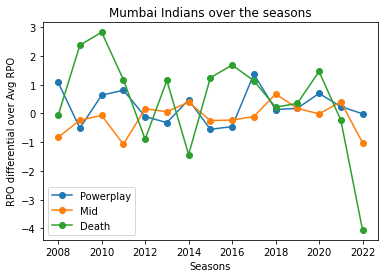

In [78]:
rpo_journey_combined_over_avg('Mumbai Indians')

The graph for rpo_journey_combined_over_avg is similar to the rpo_journey_combined since the avg RPO diff is always going to be close to one,<br>
as the teams would cancel out each other.

### Journey of a team based on its RPO scored and conceded

In [26]:
def team_rpo_journey(team_name, start_over=0, end_over=6, show_graph=True):
    seasons = range(2008, 2023)
    scored = []
    conceded = []
    for season in seasons:
        try:
            sc, c = conceded_scored_rpo(season=str(season), start_over=start_over, end_over=end_over, show_graph=False)[team_name]
            scored.append(sc)
            conceded.append(c)
        except KeyError:
            scored.append(0)
            conceded.append(0)
            continue
    
    if show_graph:
        plt.plot(seasons, scored, marker='o')
        plt.plot(seasons, conceded, marker='o')
        plt.xlabel('Seasons')
        plt.ylabel('RPO')
        plt.title(f'{team_name} over the seasons, Overs: {start_over} to {end_over}')
        plt.legend(['Scored', 'Conceded'])
        plt.show()

    return scored, conceded


In [29]:
def team_rpo_journey_combined(team_name):
    team_rpo_journey(team_name)
    team_rpo_journey(team_name, start_over=6, end_over=15)
    team_rpo_journey(team_name, start_over=15, end_over=19)

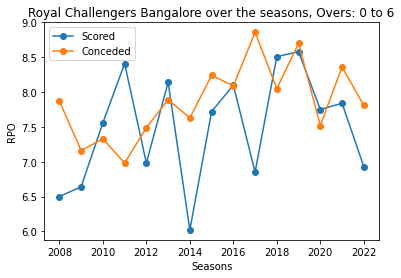

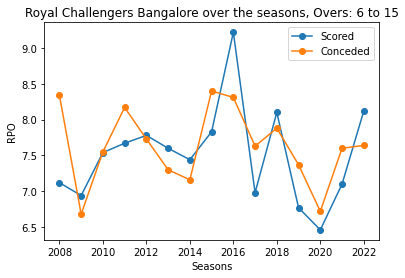

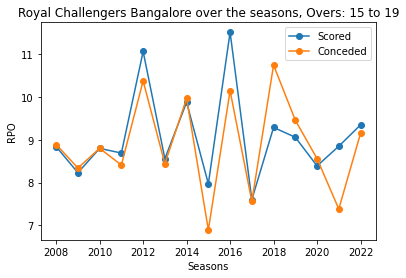

In [32]:
team_rpo_journey_combined('Royal Challengers Bangalore')

In [43]:
def team_rpo_journey_over_avg(team_name, start_over=0, end_over=6, show_graph=True, bar=False):
    seasons = range(2008, 2023)
    scored = []
    conceded = []
    for season in seasons:
        try:
            rpo_dict = conceded_scored_rpo(season=str(
                season), start_over=start_over, end_over=end_over, show_graph=False)
            avg_sc = sum([i for i,j in rpo_dict.values()])/len(rpo_dict)
            avg_c = sum([j for i,j in rpo_dict.values()])/len(rpo_dict) 
            scored.append(rpo_dict[team_name][0]-avg_sc)
            conceded.append(rpo_dict[team_name][1]-avg_c)

        except KeyError:
            scored.append(0)
            conceded.append(0)
            continue

    if show_graph:
        if bar:
            plt.bar(seasons, scored, tick_label=seasons)
            plt.xticks(rotation=60)
            plt.xlabel('Seasons')
            plt.ylabel('RPO scored over AVG')
            plt.title(f'{team_name}, overs: {start_over} to {end_over}')
            plt.show()

            plt.bar(seasons, conceded, tick_label=seasons)
            plt.xticks(rotation=60)
            plt.xlabel('Seasons')
            plt.ylabel('RPO conceded over AVG')
            plt.title(f'{team_name}, overs: {start_over} to {end_over}')
            plt.show()
        else:
            plt.plot(seasons, scored, marker='o')
            plt.plot(seasons, conceded, marker='o')
            plt.xlabel('Seasons')
            plt.ylabel('RPO differential over avg')
            plt.title(
                f'{team_name} over the seasons, Overs: {start_over} to {end_over}')
            plt.legend(['Scored', 'Conceded'])
            plt.show()

    return scored, conceded


In [46]:
def team_rpo_journey_over_avg_combined(team_name, bar=False):
    team_rpo_journey_over_avg(team_name, bar=bar)
    team_rpo_journey_over_avg(team_name, start_over=6, end_over=15, bar=bar)
    team_rpo_journey_over_avg(team_name, start_over=15, end_over=19, bar=bar)


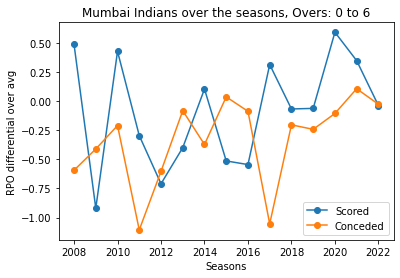

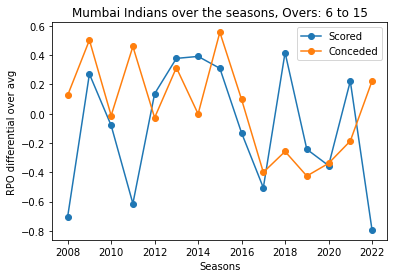

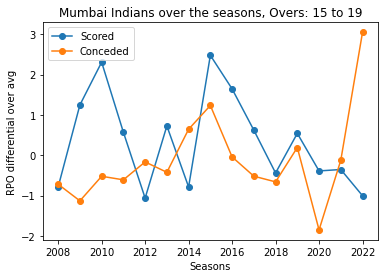

In [38]:
team_rpo_journey_over_avg_combined('Mumbai Indians')

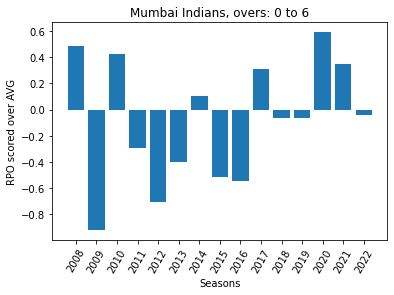

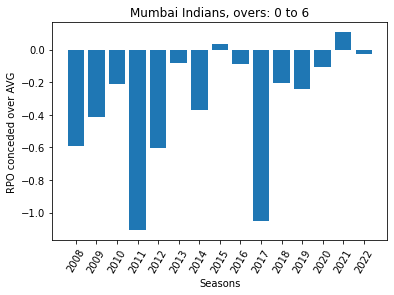

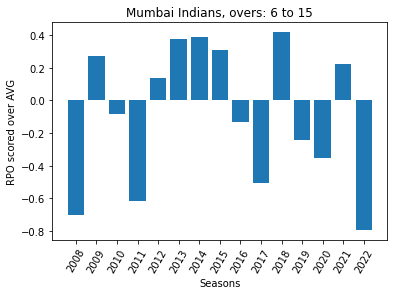

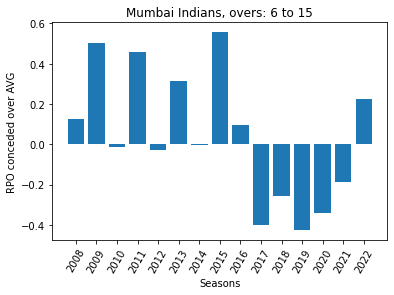

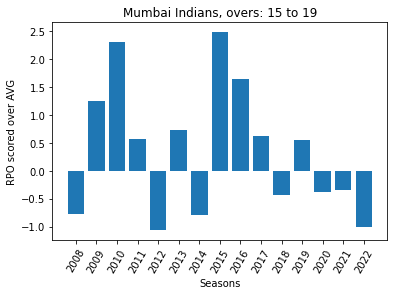

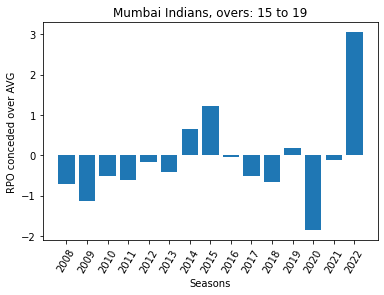

In [47]:
team_rpo_journey_over_avg_combined('Mumbai Indians', bar=True)

### Calculating Bowling and Batting average for teams

In [21]:
def bowling_batting_avg(season='2022', start_over=0, end_over=6, show_graph=True):
    ipl = overs_dict[season]
    bowling_avg = {}
    batting_avg = {}
    for team, matches in ipl.items():
        n = 0
        tot_avg = 0
        for match in matches:
            n += 1
            runs = 0
            wickets = 0
            for over in match['innings'][start_over:end_over]:
                wickets += over['wickets']
                runs += over['runs']
            if wickets == 0:
                wickets = 1
            tot_avg += runs/wickets
            batting_avg.setdefault(match['batting'], [])
            batting_avg[match['batting']].append(runs/wickets)

        if n == 0:
            n = 1

        bowling_avg[team] = tot_avg/n

    for team, matches in batting_avg.items():
        batting_avg[team] = sum(matches)/len(matches)

    teams = list(bowling_avg.keys())


    batting = []
    bowling = []
    for team in teams:
        batting.append(batting_avg[team])
        bowling.append(bowling_avg[team])
        plt.annotate(team, (batting_avg[team], bowling_avg[team]))


    if show_graph:

        plt.title(
            f'Season: {season}, overs: {start_over} to {end_over}')
        plt.xlabel('Batting Average')
        plt.ylabel('Bowling Average')
        plt.scatter(batting, bowling)
        plt.show()

    avg_dict = {team: (i, j) for team, i, j in zip(teams, bowling,  batting )}

    return avg_dict


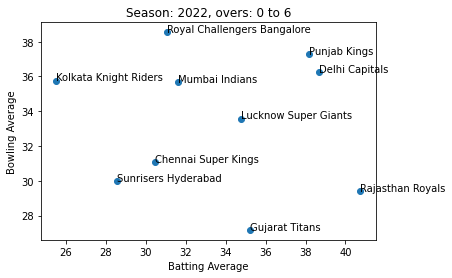

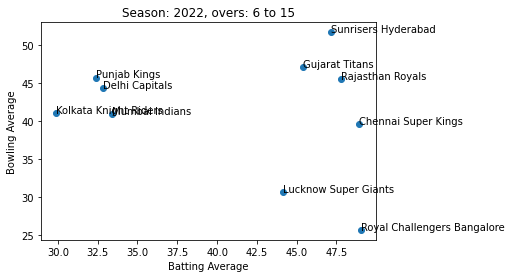

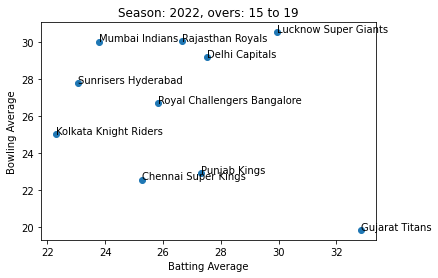

{'Kolkata Knight Riders': (22.305555555555554, 25.027777777777775),
 'Chennai Super Kings': (25.263888888888886, 22.569444444444446),
 'Delhi Capitals': (27.527777777777782, 29.152777777777782),
 'Mumbai Indians': (23.777777777777775, 30.01388888888889),
 'Punjab Kings': (27.325757575757574, 22.90909090909091),
 'Royal Challengers Bangalore': (25.819444444444443, 26.6875),
 'Gujarat Titans': (32.833333333333336, 19.854166666666668),
 'Lucknow Super Giants': (29.944444444444446, 30.51388888888889),
 'Sunrisers Hyderabad': (23.068181818181817, 27.78787878787879),
 'Rajasthan Royals': (26.666666666666668, 30.041666666666668)}

In [68]:
bowling_batting_avg()
bowling_batting_avg(start_over=6, end_over=15)
bowling_batting_avg(start_over=15, end_over=19)

### Bowling Avergae vs Conceded RPO graph
This will show which team is the best, since taking wickets in PP is very important

In [30]:
def conceded_rpo_vs_bowling_avg(season='2022', start_over=0, end_over=6, show_graph=False):
    rpos_dict = conceded_scored_rpo(season=season, start_over=start_over, end_over=end_over,show_graph=False)
    avgs_dict = bowling_batting_avg(season=season, start_over=start_over, end_over=end_over,show_graph=False)

    conceded_rpo = {team: rpos[0] for team, rpos in rpos_dict.items()}
    bowling_avg = {team: avgs[0] for team, avgs in avgs_dict.items()}

    teams = list(rpos_dict.keys())
    # team_acronyms = list(map(acronym, teams))

    rpo = []
    avg = []
    for team in teams:
        rpo.append(conceded_rpo[team])
        avg.append(bowling_avg[team])
        plt.annotate(acronym(team), (conceded_rpo[team], bowling_avg[team]))

    if show_graph:

        plt.title(
            f'Season: {season}, overs: {start_over} to {end_over}')
        plt.xlabel('Economy')
        plt.ylabel('Bowling Average')
        plt.scatter(rpo, avg)
        plt.show()

    conceded_rpo_vs_bowling_avg_dict = {team: (i, j) for team, i, j in zip(teams, rpo,  avg)}

    return conceded_rpo_vs_bowling_avg_dict
        


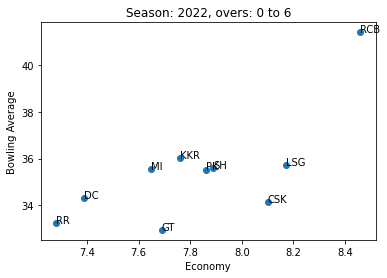

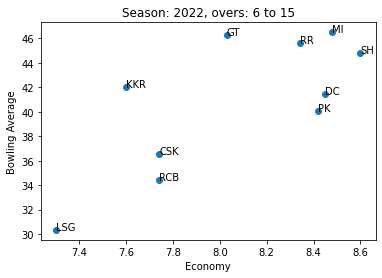

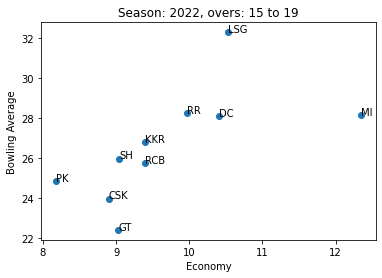

{'Chennai Super Kings': (8.9, 23.98809523809524),
 'Royal Challengers Bangalore': (9.39, 25.744791666666668),
 'Punjab Kings': (8.18, 24.857142857142858),
 'Mumbai Indians': (12.34, 28.130952380952383),
 'Delhi Capitals': (10.41, 28.0952380952381),
 'Sunrisers Hyderabad': (9.04, 25.976190476190478),
 'Rajasthan Royals': (9.97, 28.230392156862745),
 'Gujarat Titans': (9.03, 22.421875),
 'Lucknow Super Giants': (10.53, 32.27777777777778),
 'Kolkata Knight Riders': (9.4, 26.785714285714285)}

In [28]:
#powerplay
conceded_rpo_vs_bowling_avg(show_graph=True)

# Middle Overs
conceded_rpo_vs_bowling_avg(start_over=6, end_over=15,show_graph=True)

#end_overs
conceded_rpo_vs_bowling_avg(start_over=15, end_over=19,show_graph=True)

### Batting Avergae vs Scored RPO graph

In [32]:
def scored_rpo_vs_batting_avg(season='2022', start_over=0, end_over=6, show_graph=False):
    rpos_dict = conceded_scored_rpo(
        season=season, start_over=start_over, end_over=end_over, show_graph=False)
    avgs_dict = bowling_batting_avg(
        season=season, start_over=start_over, end_over=end_over, show_graph=False)

    scored_rpo = {team: rpos[1] for team, rpos in rpos_dict.items()}
    batting_avg = {team: avgs[1] for team, avgs in avgs_dict.items()}

    teams = list(rpos_dict.keys())
    # team_acronyms = list(map(acronym, teams))

    rpo = []
    avg = []
    for team in teams:
        rpo.append(scored_rpo[team])
        avg.append(batting_avg[team])
        plt.annotate(acronym(team), (scored_rpo[team], batting_avg[team]))

    if show_graph:

        plt.title(
            f'Season: {season}, overs: {start_over} to {end_over}')
        plt.xlabel('Run Rate')
        plt.ylabel('Batting Average')
        plt.scatter(rpo, avg)
        plt.show()

    scored_rpo_vs_batting_avg_dict = {
        team: (i, j) for team, i, j in zip(teams, rpo,  avg)}

    return scored_rpo_vs_batting_avg_dict


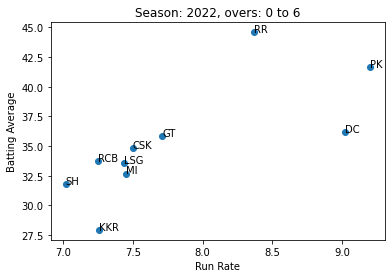

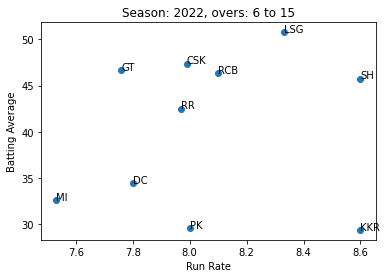

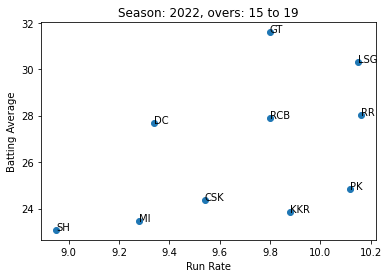

{'Chennai Super Kings': (9.54, 24.369047619047617),
 'Royal Challengers Bangalore': (9.8, 27.911458333333332),
 'Punjab Kings': (10.12, 24.827380952380953),
 'Mumbai Indians': (9.28, 23.452380952380953),
 'Delhi Capitals': (9.34, 27.666666666666668),
 'Sunrisers Hyderabad': (8.95, 23.077380952380953),
 'Rajasthan Royals': (10.16, 28.029411764705884),
 'Gujarat Titans': (9.8, 31.59375),
 'Lucknow Super Giants': (10.15, 30.311111111111117),
 'Kolkata Knight Riders': (9.88, 23.833333333333332)}

In [34]:
#powerplay
scored_rpo_vs_batting_avg(show_graph=True)

# Middle Overs
scored_rpo_vs_batting_avg(start_over=6, end_over=15, show_graph=True)

#end_overs
scored_rpo_vs_batting_avg(start_over=15, end_over=19, show_graph=True)
